In [ ]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# SQL query
sql_query = "SELECT * FROM nifty;"

# Execute SQL query
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all the results
rows = cursor.fetchall()

# Convert to predicted_dfFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

# Close cursor and connection
cursor.close()
conn.close()

# Display the DataFrame
print(df)


In [1]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# SQL query
sql_query = "SELECT  TO_TIMESTAMP(lasttradetime) AT TIME ZONE 'Asia/Kolkata' AS time, open,high,low,close,openinterest FROM whole_indices_futures WHERE instrumentidentifier = 'BANKNIFTY10APR2448000CE' order by lasttradetime;"

# Execute SQL query
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all the results
rows = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

# Close cursor and connection
cursor.close()
conn.close()

# Display the DataFrame
print(df)


                    time     open     high      low    close  openinterest
0    2024-03-07 09:48:00  1140.00  1140.00  1140.00  1140.00             0
1    2024-03-07 09:49:00  1140.00  1140.00  1140.00  1140.00             0
2    2024-03-07 09:50:00  1140.00  1140.00  1140.00  1140.00             0
3    2024-03-07 09:51:00  1140.00  1140.00  1140.00  1140.00             0
4    2024-03-07 09:52:00  1140.00  1140.00  1140.00  1140.00             0
...                  ...      ...      ...      ...      ...           ...
7039 2024-04-05 15:26:00   705.40   712.00   704.00   712.00       1889835
7040 2024-04-05 15:27:00   711.95   717.70   704.30   704.30       1889835
7041 2024-04-05 15:28:00   702.95   707.90   699.05   707.90       1907715
7042 2024-04-05 15:29:00   707.90   714.60   705.10   714.60       1907715
7043 2024-04-05 15:30:00   715.00   715.00   715.00   715.00       1907715

[7044 rows x 6 columns]


In [4]:
df.head(5635)

,open,high,low,close,openinterest
time,,,,,
2024-03-07 09:48:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:49:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:50:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:51:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:52:00,1140.00,1140.00,1140.00,1140.00,0
...,...,...,...,...,...
2024-04-02 10:45:00,301.50,301.50,295.10,295.10,423210
2024-04-02 10:46:00,295.10,308.25,295.10,303.60,423210
2024-04-02 10:47:00,301.25,303.60,299.05,301.10,423210


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

df.set_index('time', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 3
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=50))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data


Epoch 1/50


C:\Users\santh\AppData\Local\Temp\ipykernel_20392\858423386.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0274 - val_loss: 0.0645
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5834e-04 - val_loss: 0.0505
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0595e-04 - val_loss: 0.0248
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5304e-04 - val_loss: 0.0022
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3948e-04 - val_loss: 6.9516e-04
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1245e-04 - val_loss: 9.6464e-04
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0980e-04 - val_loss: 0.0013
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4038e-04 - val_loss: 0.0013
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2366e-04 - val_loss: 0.0016
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2960e-04 - val_loss: 0.0016
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0552e-04 - val_loss: 0.0019
Epoch 12/50
176

,open,high,low,close,tradedqty
0,301.933014,305.688873,297.924530,302.567108,4.316963e+05
1,301.675903,305.458649,297.687866,302.294983,4.319558e+05
2,298.545929,302.191223,294.650482,299.380463,4.316776e+05
3,293.809692,297.402283,290.204102,294.858368,4.328676e+05
4,291.795074,295.564240,288.371124,292.715698,4.349930e+05
...,...,...,...,...,...
1403,811.607422,793.679871,685.923096,783.125183,1.803908e+06
1404,797.030579,779.180054,674.653625,770.436096,1.796882e+06
1405,803.618713,786.346497,681.431335,776.064453,1.796200e+06
1406,799.216492,781.983398,678.164917,772.133179,1.783374e+06


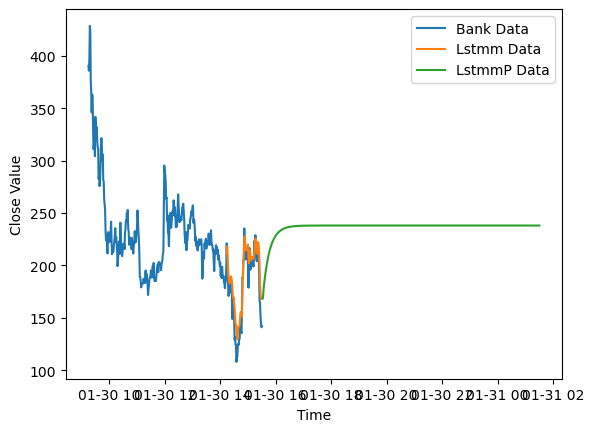

In [60]:
import matplotlib.pyplot as plt 
import pandas as pd

# Load datasets
bank_data = pd.read_csv('bank.csv')
lstmm_data = pd.read_csv('Lstmm.csv')
lstmm_Pdata = pd.read_csv('LstmmP.csv')


# Convert 'Datetime' columns to datetime objects
bank_data['Datetime'] = pd.to_datetime(bank_data['Datetime'])
lstmm_data['lasttradetime'] = pd.to_datetime(lstmm_data['lasttradetime'])
lstmm_Pdata['lasttradetime'] = pd.to_datetime(lstmm_Pdata['lasttradetime'])

# Sort datasets by 'Datetime' column
bank_data.sort_values(by='Datetime', inplace=True)
lstmm_data.sort_values(by='lasttradetime', inplace=True)

# Plot bank data
plt.plot(bank_data['Datetime'], bank_data['close'], label='Bank Data')

# Plot Lstmm data on top of bank data
plt.plot(lstmm_data['lasttradetime'], lstmm_data['close'], label='Lstmm Data')
plt.plot(lstmm_Pdata['lasttradetime'], lstmm_Pdata['close'], label='LstmmP Data')

# Labeling and legend
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()

# Show plot
plt.show()


In [ ]:
frequency = 'T'
start_time = '2024-01-30 14:14:00+00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(data) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
data['lasttradetime'] = date_range
data.set_index('lasttradetime', inplace=True)
data.to_csv('Lstmm.csv')
data

In [3]:
def generate_predictions(model, last_sequence, num_predictions):
    predictions = []
    current_sequence = last_sequence.reshape(1, lookback_window, features)  # Reshape to match model input shape
    for _ in range(num_predictions):
        next_prediction = model.predict(current_sequence)  # Predict the next data point
        predictions.append(next_prediction[0])  # Append the prediction to the list of predictions
        current_sequence = np.append(current_sequence[:, 1:, :], next_prediction.reshape(1, 1, features), axis=1)  # Update the current sequence
    return predictions

# Generate predictions for the next 60 data points
last_sequence = X_test[-1]  # Using the last sequence from the test data
num_predictions = 60
predicted_data = generate_predictions(model, last_sequence, num_predictions)

# Inverse transform the predictions to obtain the original scale
predicted_data_original = scaler.inverse_transform(predicted_data)

# Create a DataFrame with the predicted values and column names
predicted_df = pd.DataFrame(predicted_data_original, columns=['open', 'high', 'low', 'close', 'tradedqty'])

# Print the predicted data
print(predicted_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [10]:
frequency = 'T'
start_time = '2024-04-02 10:49:00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(predicted_df) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
predicted_df['lasttradetime'] = date_range
predicted_df.set_index('lasttradetime', inplace=True)
predicted_df.to_csv('LstmmP.csv')


predicted_df

In [ ]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# Create a cursor object
cur = conn.cursor()

# Define the table name
table_name = 'predicted_data'

# Create a table if it doesn't exist
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    id SERIAL PRIMARY KEY,
    open NUMERIC,
    high NUMERIC,
    low NUMERIC,
    close NUMERIC,
    tradedqty NUMERIC
);
"""
cur.execute(create_table_query)
conn.commit()

# Insert predicted data into the database
for index, row in predicted_df.iterrows():
    insert_query = f"""
    INSERT INTO {table_name} (open, high, low, close, tradedqty)
    VALUES ({row['open']}, {row['high']}, {row['low']}, {row['close']}, {row['tradedqty']});
    """
    cur.execute(insert_query)
    conn.commit()

# Close cursor and connection
cur.close()
conn.close()
